In [1]:
from HW2_3 import ViscekModel
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
from os.path import join,exists
from os import makedirs

output_dir = '../../outf/HW2-3'
if not exists(output_dir):
    makedirs(output_dir)

N1 = 400
N2 = 800
simulation1 = ViscekModel(num_particles=N1)
simulation2 = ViscekModel(num_particles=N2)

Simulation of 800 particles: 100%|██████████| 299/299 [04:11<00:00,  1.19it/s]


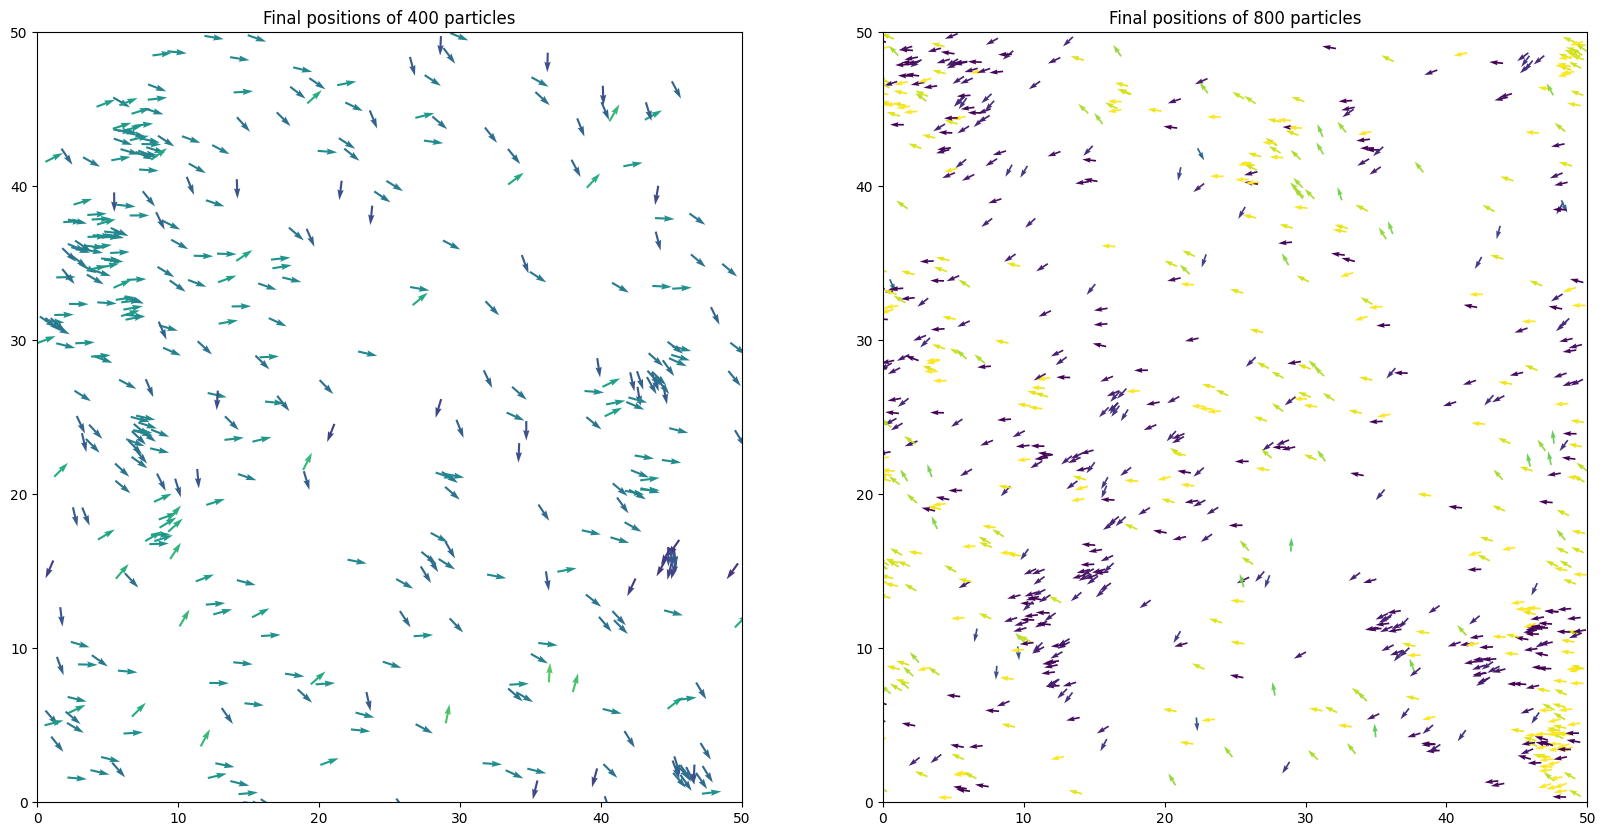

In [3]:
def plot_final_positions(viscek_simulations):
    num_simulations = len(viscek_simulations)
    
    fig, axes = plt.subplots(1, num_simulations, figsize=(10 * num_simulations, 10))
    
    if num_simulations == 1:
        axes = [axes]
    
    for i, simulation in enumerate(viscek_simulations):
        ax = axes[i]
        x, y, orientation_x, orientation_y, theta = simulation.x, simulation.y, simulation.orientation_x, simulation.orientation_y, simulation.theta
        
        ax.quiver(x[-1, :], y[-1, :], orientation_x[-1, :], orientation_y[-1, :], theta[-1, :], clim=[-np.pi, np.pi])
        ax.set_title(f"Final positions of {simulation.num_particles} particles")
        ax.set_xlim(0, simulation.box_size)
        ax.set_ylim(0, simulation.box_size)

    plt.show()

def animate_simulations(viscek_simulations, filename='simulations_animation.gif', show_final_positions=True):
    num_simulations = len(viscek_simulations)

    fig, axes = plt.subplots(1, num_simulations, figsize=(10 * num_simulations, 10))

    if num_simulations == 1:
        axes = [axes]

    quivers = []

    for i, simulation in enumerate(viscek_simulations):
        ax = axes[i]
        x, y, orientation_x, orientation_y, theta = simulation.x, simulation.y, simulation.orientation_x, simulation.orientation_y, simulation.theta
        quiver = ax.quiver(x[0, :], y[0, :], orientation_x[0, :], orientation_y[0, :], theta[0, :], clim=[-np.pi, np.pi])
        quivers.append(quiver)
        ax.set_title(f"{simulation.num_particles} particles")
        ax.set_xlim(0, simulation.box_size)
        ax.set_ylim(0, simulation.box_size)

    def update(frame):
        for i, simulation in enumerate(viscek_simulations):
            x, y, orientation_x, orientation_y, theta = simulation.x, simulation.y, simulation.orientation_x, simulation.orientation_y, simulation.theta
            quivers[i].set_offsets(np.column_stack((x[frame, :], y[frame, :])))
            quivers[i].set_UVC(orientation_x[frame, :], orientation_y[frame, :], theta[frame, :])
        return tuple(quivers)

    max_time_steps = max([simulation.num_time_steps for simulation in viscek_simulations])
    anim = FuncAnimation(fig, update, frames=max_time_steps, blit=True, interval=100)

    writer = animation.PillowWriter(fps=10)
    anim.save(filename, writer=writer)
    plt.close()

    if show_final_positions:
        plot_final_positions(viscek_simulations)


animate_simulations([simulation1, simulation2], filename=join(output_dir,'simulations_animation.gif'))
